In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#load the lib and datset 

In [33]:
ds = pd.read_csv(r"D:\ML git hub practice\data\Salary_Data.csv")
X = ds["YearsExperience"].values
Y = ds["Salary"].values # extract feature and target 

In [34]:
X

array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.2,  3.7,  3.9,
        4. ,  4. ,  4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,
        7.9,  8.2,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5])

In [35]:
Y

array([ 39343,  46205,  37731,  43525,  39891,  56642,  60150,  54445,
        64445,  57189,  63218,  55794,  56957,  57081,  61111,  67938,
        66029,  83088,  81363,  93940,  91738,  98273, 101302, 113812,
       109431, 105582, 116969, 112635, 122391, 121872])

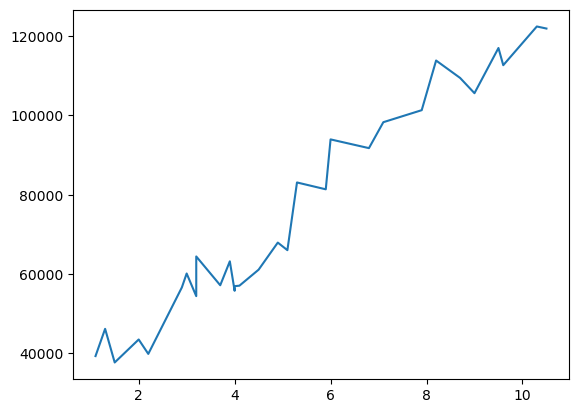

In [36]:
plt.plot(X,Y)

In [37]:
# convert into munpy array from pandas
X = np.array(X)
Y = np.array(Y)

In [38]:
#normalizing the dataset 
def mean(X):
    return np.sum(X)/len(X) # find the mean
# it add all values 
#Divides by total count 
# gives center of data

In [39]:
def variance(X):
    mean_value = mean(X)
    return np.sum((X-mean_value)**2)/len(X) # find the variance 
# measure spread of data 
# tell how far points are the mean


In [40]:
def norm(X):
    mean_value = mean(X)
    variance_value = variance(X)
    return (X-mean_value)/np.sqrt(variance_value)
# or i can write (x-mean_value)/std
# Normalization(Z-score) substract mean get center data at 0
# divides by standas deviation give scale data
# keeps shape of line, just chages scale

In [41]:
X_norm = norm(X) # normalize X
#mean of XX_norm =0
#std of X_norm =1
# normalization does not change the relanship it changes the scale

In [42]:
norm(X)

array([-1.51005294, -1.43837321, -1.36669348, -1.18749416, -1.11581443,
       -0.86493538, -0.82909552, -0.75741579, -0.75741579, -0.57821647,
       -0.50653674, -0.47069688, -0.47069688, -0.43485702, -0.29149756,
       -0.1481381 , -0.07645838, -0.00477865,  0.21026054,  0.2461004 ,
        0.53281931,  0.6403389 ,  0.92705781,  1.03457741,  1.21377673,
        1.32129632,  1.50049564,  1.5363355 ,  1.78721455,  1.85889428])

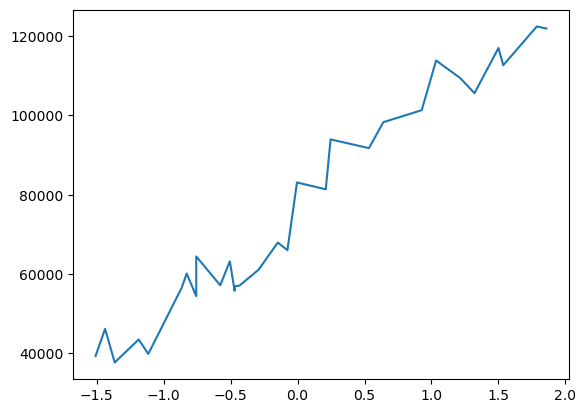

In [43]:
plt.plot(X_norm,Y)

In [44]:
import random

In [95]:
class SimpleLR:
    def __init__(self,lr=0.01, max_iter=2000, threshold=1e-6):
        self.lr = lr
        self.max_iter= max_iter
        self.threshold = threshold # self is required to store variable inside the object
        self.weight = random.uniform(-1,1)
        self.bias = random.uniform(-1,1)
        

    def predict(self,X):
        return self.weight * X + self.bias
    
    def fit(self,X,Y):
        n = len(X)
        loss_history = []

        #initial prediction
        y_pred = self.predict(X)
        errors = y_pred - Y
        prev_loss = (1/(2*n))* np.sum(errors**2)
        loss_history.append(prev_loss)

        for i in range(self.max_iter):
            # gradients
            w_grad = (1/n) * np.sum(errors * X)
            b_grad = (1/n) * np.sum(errors)

            #update prameters
            self.weight -= self.lr * w_grad
            self.bias -= self.lr * b_grad

            # new prediction 
            y_pred = self.predict(X)
            errors = y_pred - Y
            curr_loss = (1/(2*n)) * np.sum(errors**2)

            if np.abs(curr_loss -prev_loss) < self.threshold:
                break

            prev_loss = curr_loss
            loss_history.append(curr_loss)

        return loss_history 
    
    def plot(slef,X,Y):
        y_pred = slef.predict(X)
        plt.plot(X,Y)
        plt.plot(X,y_pred)

In [96]:
model = SimpleLR()

In [97]:
loss_history = model.fit(X_norm, Y)

In [87]:
loss_history

[np.float64(3251517611.3755755),
 np.float64(3257992611.5287395),
 np.float64(3251511139.6145406),
 np.float64(3245042624.1626973),
 np.float64(3238587039.273242),
 np.float64(3232144359.097983),
 np.float64(3225714557.8403916),
 np.float64(3219297609.7555146),
 np.float64(3212893489.1498594),
 np.float64(3206502170.3812957),
 np.float64(3200123627.85895),
 np.float64(3193757836.0431066),
 np.float64(3187404769.4451027),
 np.float64(3181064402.6272283),
 np.float64(3174736710.202623),
 np.float64(3168421666.8351736),
 np.float64(3162119247.2394176),
 np.float64(3155829426.1804323),
 np.float64(3149552178.4737444),
 np.float64(3143287478.985221),
 np.float64(3137035302.6309757),
 np.float64(3130795624.377263),
 np.float64(3124568419.2403793),
 np.float64(3118353662.286565),
 np.float64(3112151328.6319),
 np.float64(3105961393.442211),
 np.float64(3099783831.9329667),
 np.float64(3093618619.369179),
 np.float64(3087465731.0653067),
 np.float64(3081325142.385154),
 np.float64(3075196828.7

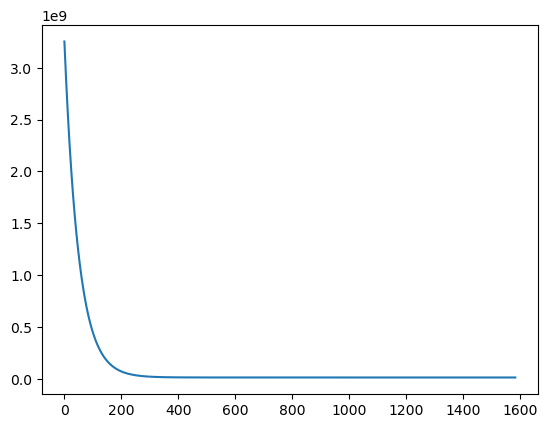

In [98]:
plt.plot(loss_history)

In [ ]:
# ie is inc means gradient descent is still diverging 
# gradient descent must decrease loss

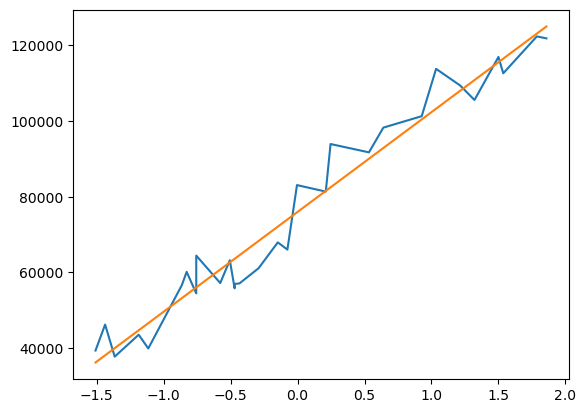

In [99]:
model.plot(X_norm,Y)